In [90]:
import numpy as np
import matplotlib.pylab as plt

미분을 파이썬으로 구현

In [91]:
def numerical_diff(f,x):
    h=10e-50
    return(f(x+h) - f(x))/ h

In [92]:
def numerical_diff2(f,x):
    h = 1e-4
    return (f(x+h) - f(x-h)) / (2*h)

In [93]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

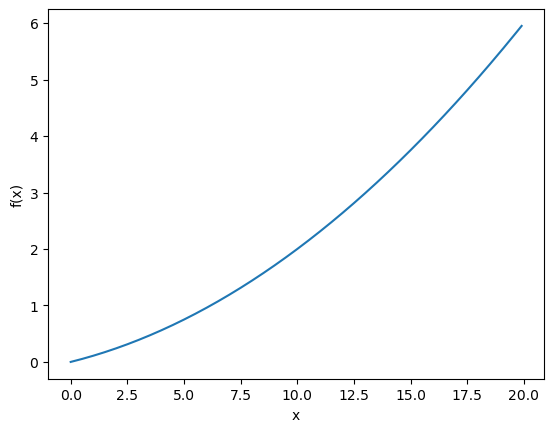

In [94]:
x = np.arange(0.0, 20.0, 0.1)
y= function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

In [95]:
numerical_diff2(function_1,5)

0.1999999999990898

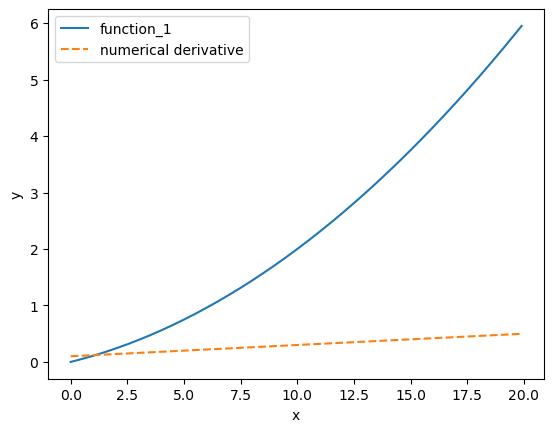

In [96]:
dy = numerical_diff2(function_1, x)

plt.figure()
plt.plot(x, y, label='function_1')
plt.plot(x, dy, label='numerical derivative', linestyle='--')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [97]:
numerical_diff2(function_1,10)

0.2999999999986347

편미분

In [99]:
def partial_diff(x):
    return x[0]**2 + x[1]**2

In [74]:
def numerical_gradient(f, x):
    h= 1e-4 # 0.0001
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성

    for idx in range(x.size):
        tmp_val = x[idx]

        #f(x+h) 계산
        x[idx] = float(tmp_val) +h
        fxh1 = f(x)
    
        #f(x-h) 계산
        x[idx] = tmp_val -h
        fxh2 = f(x)
    
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원

    return grad

In [75]:
numerical_gradient(partial_diff, np.array([3.0, 4.0]))

array([6., 8.])

In [76]:
numerical_gradient(partial_diff, np.array([0.0, 2.0]))

array([0., 4.])

In [77]:
numerical_gradient(partial_diff, np.array([3.0, 0.0]))

array([6., 0.])

In [104]:
#경사 하강법 구현

In [106]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x=init_x

    for i in range(step_num):
        grad = numerical_gradient(f,x)
        x -= lr *grad

    return x

In [108]:
init_x = np.array([-3.0, 4.0])
gradient_descent(partial_diff, init_x=init_x, lr=0.1, step_num=100)

array([-6.11110793e-10,  8.14814391e-10])